In [28]:
# Costruire la classifica di serie A
array_squadra= ["Inter", "Juventus", "Milan"]
array_punteggio= [41,37,32]
classifica_serieA = dict()

for i in range(len(array_squadra)):
    classifica_serieA[array_squadra[i]]=array_punteggio[i]

print(classifica_serieA)
print("Punteggio Juventus:", classifica_serieA["Juventus"])

{'Inter': 41, 'Juventus': 37, 'Milan': 32}
Punteggio Juventus: 37


In [30]:
# costruisco una funzione a 3 parametri: dizionario, squadra, punteggio. diz[squadra]= punteggio

classifica_serieA={}

def creaClassifica (dict_input, squadra, punteggio):
    dict_input[squadra]=punteggio
    return dict_input

for i in range(3):
    squadra=input("Inserisci una squadra")
    punteggio = input(f"Inserisci il punteggio della squadra {squadra}: ")
    classifica_serieA= creaClassifica(classifica_serieA, squadra, punteggio)
    
classifica_serieA

{'Inter': '41', 'Juventus': '37', 'Milan': '32'}

In [10]:
list_names = ["pippo", "pluto", "paperino"]

# costruire una funzione che mi dice: il nome selezionato ha x lettere
# esempio: pippo ha 5 lettere

for name in list_names:
    print(name, "ha", len(name), "lettere")

pippo ha 5 lettere
pluto ha 5 lettere
paperino ha 8 lettere


In [13]:
# step di generalizzazione

def contalettere(list_name_imput, lista_index):
    string_evaluation= f"{list_name_imput[lista_index]} ha {len(list_name_imput[lista_index])} lettere."
    return string_evaluation
list_names= ["pippo", "pluto", "paperino"]

for i in range(len(list_names)):
    print(contalettere(list_names,i))

pippo ha 5 lettere.
pluto ha 5 lettere.
paperino ha 8 lettere.
['pippo', 'pluto', 'paperino']


In [15]:
def inseriscinome(list_name_imput, new_name):
    list_name_imput.append(new_name)
    return

inseriscinome(list_names, "topolino")

print(list_names)

['pippo', 'pluto', 'paperino', 'Topolino', 'topolino']


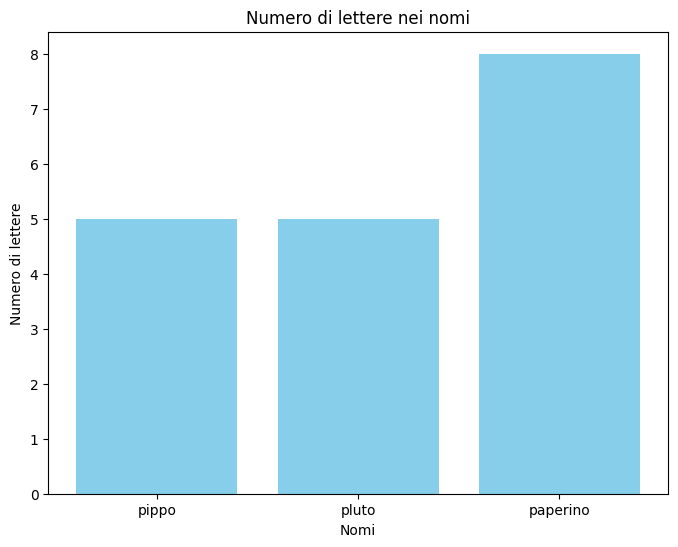

In [21]:
# grafico a barre in cui asse x = nomi, asse y = numero di lettere

import matplotlib.pyplot as plt

list_names = ['pippo', 'pluto', 'paperino']
lunghezze = [len(nome) for nome in list_names]

plt.figure(figsize=(8, 6))
plt.bar(list_names, lunghezze, color='skyblue')
plt.xlabel('Nomi')
plt.ylabel('Numero di lettere')
plt.title('Numero di lettere nei nomi')
plt.show()

In [ ]:
# how many palindrom days there have been?
# 22/02/2022
# 1. Define functions to convert any day in a DD/MM/YYYY format
 
# 2. generate a date range
 
# 3. Verify if the date is palindrome
 
# 4. Format a nice output!

## Connessione a sql server

In [35]:
%pip install pyodbc

  Obtaining dependency information for pyodbc from https://files.pythonhosted.org/packages/c3/ef/2d24457682b4b239748f1d25c8a88b88ba99214fd78bedde54ff6186422c/pyodbc-5.0.1-cp312-cp312-win_amd64.whl.metadata
   ---------------------------------------- 0.0/69.2 kB ? eta -:--:--
   ----- ---------------------------------- 10.2/69.2 kB ? eta -:--:--
   ---------------------------------------- 69.2/69.2 kB 756.5 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [42]:
import pyodbc
# py OBDC: open database connection
print(pyodbc.drivers())
driver =  'ODBC Driver 17 for SQL Server'

['SQL Server', 'SQL Server Native Client RDA 11.0', 'ODBC Driver 17 for SQL Server', 'Microsoft Access Driver (*.mdb, *.accdb)', 'Microsoft Excel Driver (*.xls, *.xlsx, *.xlsm, *.xlsb)', 'Microsoft Access Text Driver (*.txt, *.csv)']


In [46]:
# la prima connessione al bastabase sql server
driver = 'ODBC Driver 17 for SQL Server'
server = 'localhost'
database= 'Test_C001'
conn_string =  f"DRIVER={driver};SERVER={server};DATABASE={database};Trusted_Connection=yes"

print(conn_string)

DRIVER=ODBC Driver 17 for SQL Server;SERVER=localhost;DATABASE=Test_C001;Trusted_Connection=yes


In [48]:
cnxn = pyodbc.connect(conn_string)

## creazione tabella

In [51]:
cursor = cnxn.cursor()
 
query = 'create table dbo.colori(id int identity(1,1), colore varchar(25))'
result = cursor.execute(query)
result

In [52]:
result.commit()

## inserimento record

In [57]:
query = " insert into dbo.colori values('rosso'), ('bianco'), ('verde')"

cursor.execute(query)
cursor.commit()

## lettura di record

In [64]:
query = "SELECT [id],[colore] FROM [dbo].[colori]"
table= []
tabella = cursor.execute(query)
for row in cursor:
    table.append(row)

In [65]:
# il cursore è oneshot: nel momento in cui apro il contenuto di un riga viene eliminata dal cursore
for row in cursor:
    print(row)

In [66]:
table

[(1, 'rosso'), (2, 'bianco'), (3, 'verde')]

In [67]:
query = "SELECT [id],[colore] FROM [dbo].[colori]"
table = []
cursor.execute(query)
table= cursor.fetchall()

In [68]:
table

[(1, 'rosso'), (2, 'bianco'), (3, 'verde')]

### Creazione classifica serie A

In [70]:
import json

In [74]:
classifica_serieA = {'Inter': 41, 'Juventus': 37, 'Milan': 32, 'Bologna': 28, 'Fiorentina': 27,
                    'Napoli': 27, 'Atalanta': 26, 'Roma': 25, 
                    'Torino': 23, 'Monza': 21, 'Lazio': 21, 'Lecce': 20,
                    'Frosinone': 19, 'Genoa': 16, 'Sassuolo': 16, 'Cagliari': 13, 
                    'Udinese': 13, 'Empoli': 12, 'Hellas Verona': 11, 'Salernitana': 8}
classifica_serieA_JSON = json.dumps(classifica_serieA)
query = f"exec dbo.jsonInput '{classifica_serieA_JSON}'"
cursor.execute(query)
cursor.commit()
cursor.execute("Select * from dbo.ClassificaSerieA")
print(cursor.fetchall())

ProgrammingError: ('42000', "[42000] [Microsoft][ODBC Driver 17 for SQL Server][SQL Server]Could not find stored procedure 'dbo.jsonInput'. (2812) (SQLExecDirectW)")